In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df=pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

# Display the last few rows of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2904,197503270005,1975,3,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2905,197503270006,1975,3,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2906,197503270007,1975,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
2907,197503270008,1975,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,1.0,1.0,1.0,1.0,NaN
2908,197503270009,1975,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [6]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state            10
Region            0
city              0
latitude         48
longitude        48
AttackType        0
Killed          305
Wounded        1062
Target           47
Summary        2188
Group             0
Target_type       0
Weapon_type       0
Motive         2449
dtype: int64

In [7]:
df.shape

(2909, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2909 non-null   int64  
 1   Month        2909 non-null   int64  
 2   Day          2909 non-null   int64  
 3   Country      2909 non-null   object 
 4   state        2899 non-null   object 
 5   Region       2909 non-null   object 
 6   city         2909 non-null   object 
 7   latitude     2861 non-null   float64
 8   longitude    2861 non-null   float64
 9   AttackType   2909 non-null   object 
 10  Killed       2604 non-null   float64
 11  Wounded      1847 non-null   float64
 12  Target       2862 non-null   object 
 13  Summary      721 non-null    object 
 14  Group        2909 non-null   object 
 15  Target_type  2909 non-null   object 
 16  Weapon_type  2909 non-null   object 
 17  Motive       460 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage

In [9]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,2909.000000,2909.000000,2909.000000,2861.000000,2861.000000,2604.000000,1847.000000
mean,1972.122723,6.138536,15.382606,35.713904,-35.403239,0.740015,1.226854
std,1.585828,3.421309,9.095383,24.617529,53.617887,3.219048,9.036100
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000
25%,1971.000000,3.000000,7.000000,34.097866,-75.135490,0.000000,0.000000
50%,1972.000000,6.000000,16.000000,40.697132,-7.312045,0.000000,0.000000
75%,1974.000000,9.000000,23.000000,54.183052,-1.977903,1.000000,0.000000
max,1975.000000,12.000000,31.000000,59.332788,172.636225,88.000000,238.000000


In [11]:
df['Year'].value_counts(dropna=False).sort_index()

1970    651
1971    471
1972    568
1973    473
1974    581
1975    165
Name: Year, dtype: int64

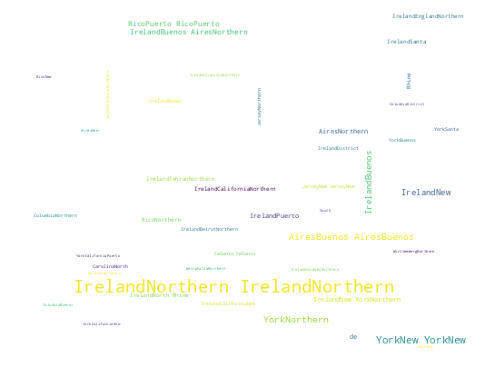

In [21]:
from wordcloud import WordCloud
from scipy import signal

cities = df.state.dropna()
plt.subplots(figsize=(6,7))
wordcloud = WordCloud(background_color='white',width=512,height=384).generate(''.join(cities))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

DATA VISUALIZATION

People Killed and Wounded In Each Year

In [22]:
b=df[["Year","Wounded"]].groupby("Year").sum()
b.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


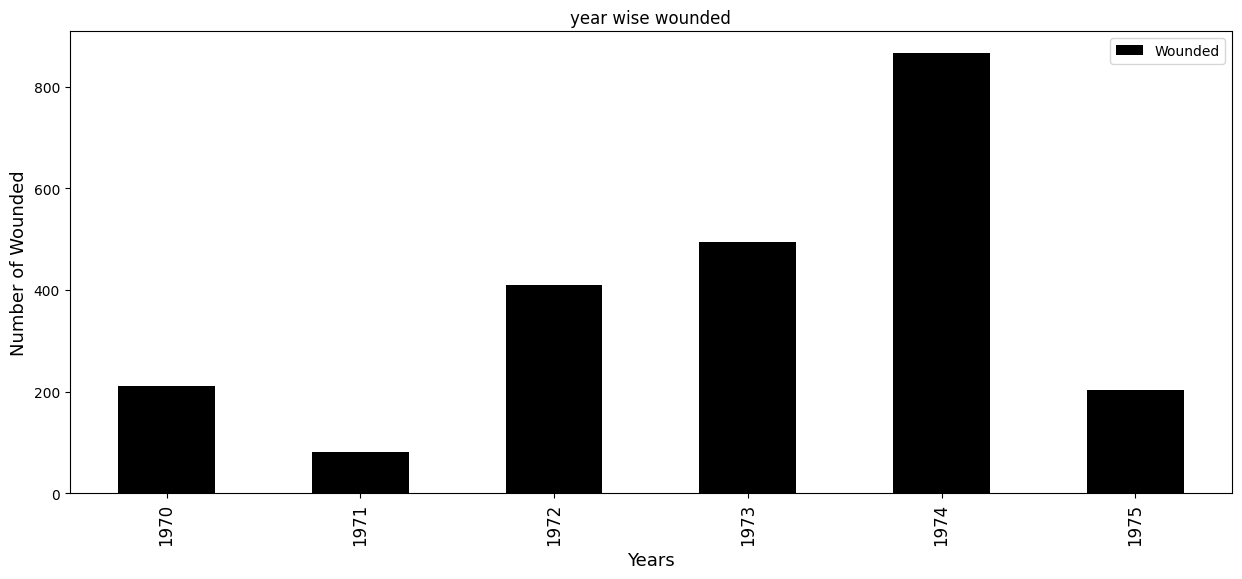

In [24]:
b.plot(kind="bar",color="black",figsize=(15,6))
plt.title("year wise wounded",fontsize=12)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()

In [25]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [26]:
w=df[["Year","Wounded"]].groupby("Year").sum()
w.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Wounded')

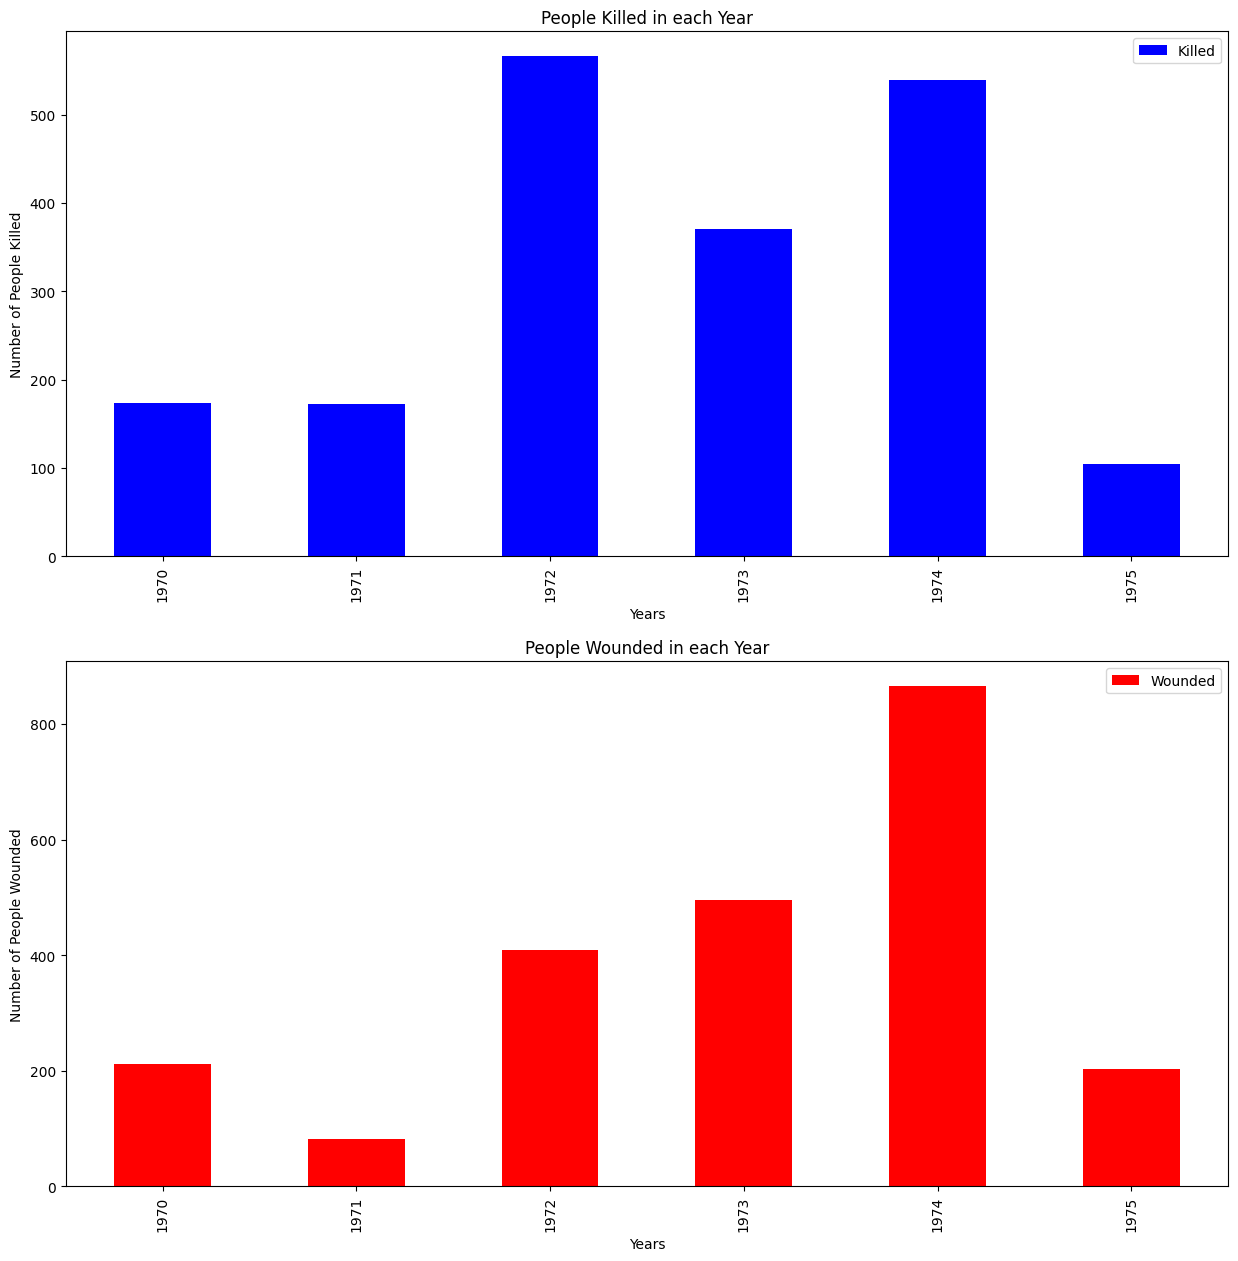

In [27]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k.plot(kind="bar",color="blue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
w.plot(kind="bar",color="red",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

Number of Terrorist Activities each Year

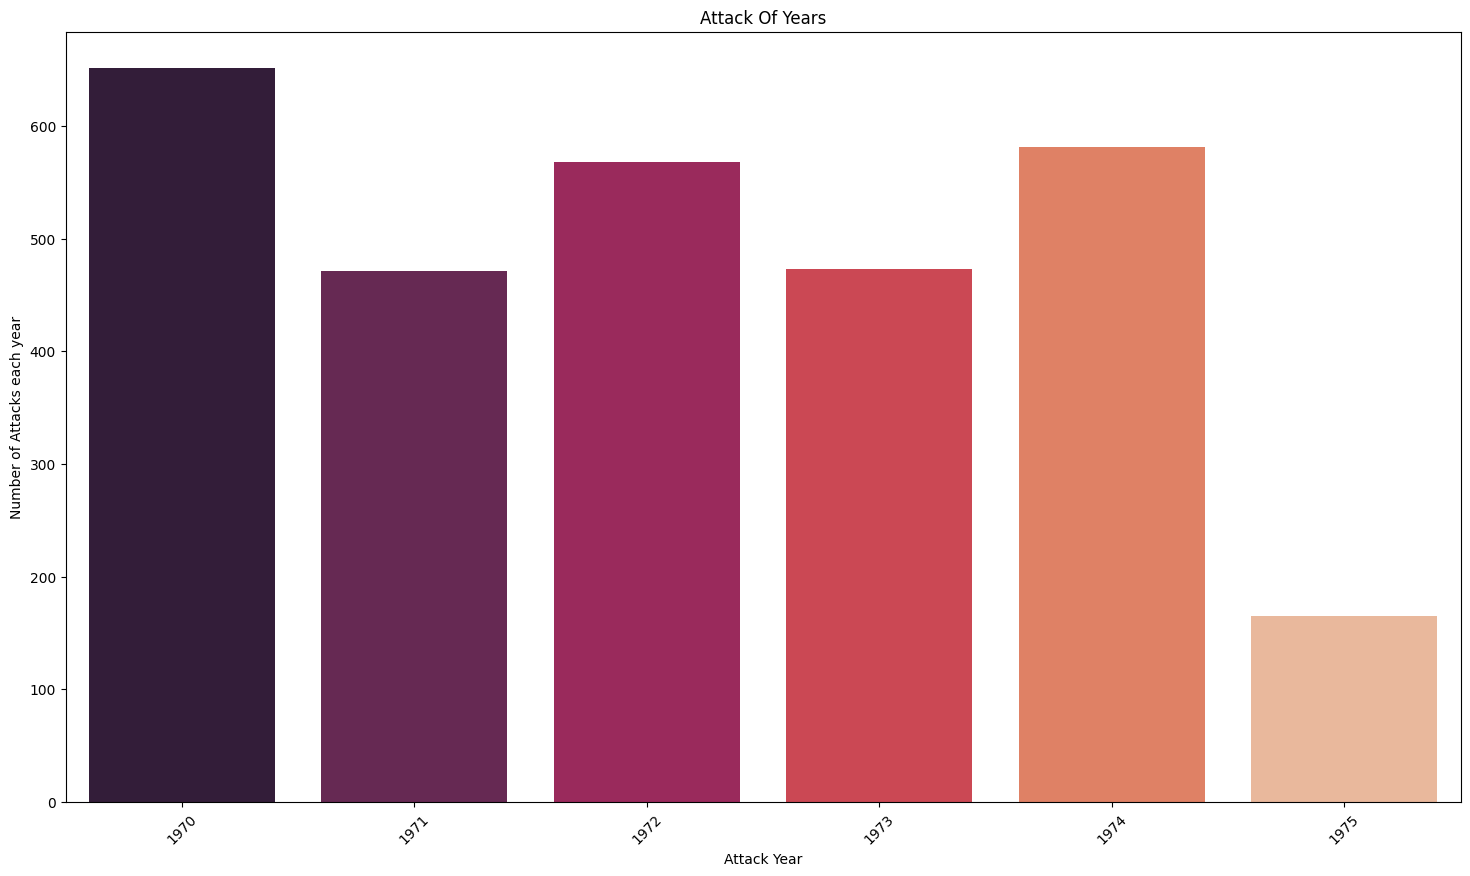

In [28]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Of Years')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

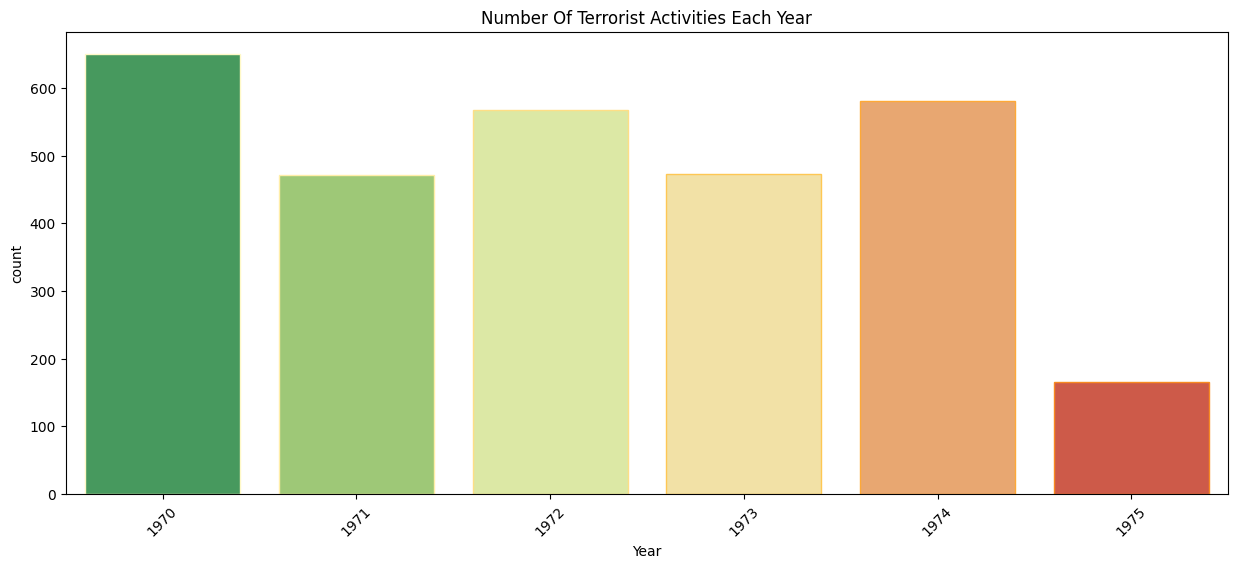

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')

Terrorist Activities by Region in each Year through Area Plo

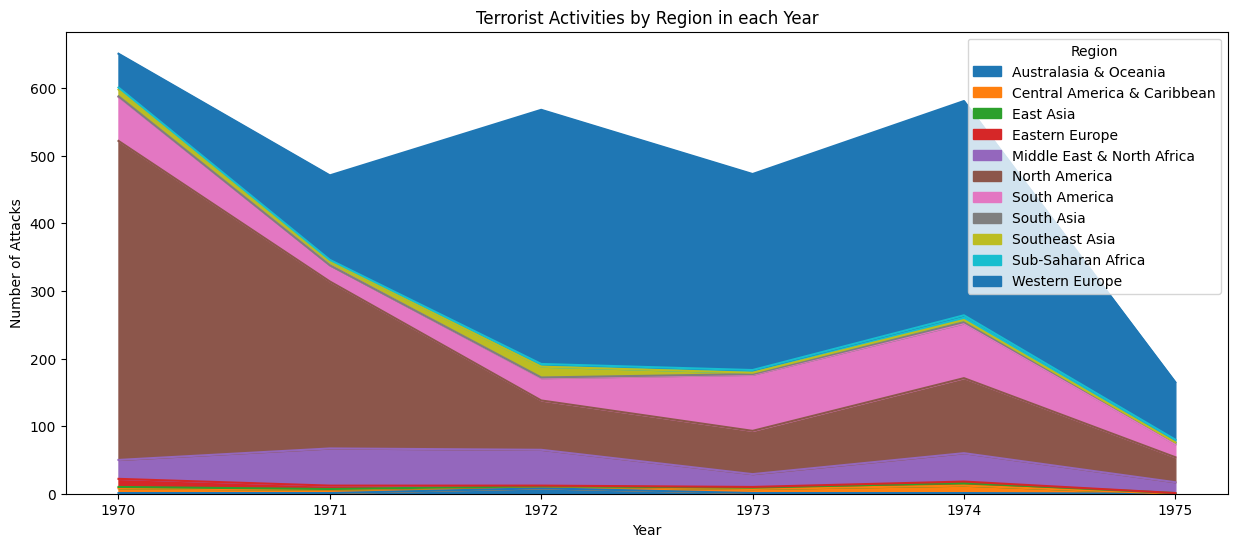

In [30]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [31]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

Top Countries affected by Terror Attacks

In [32]:
df.Country.value_counts()[:15]

United States         971
United Kingdom        811
Argentina             194
West Germany (FRG)    118
Spain                 108
France                 64
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Lebanon                33
Israel                 30
Mexico                 26
Greece                 23
Jordan                 22
Name: Country, dtype: int64

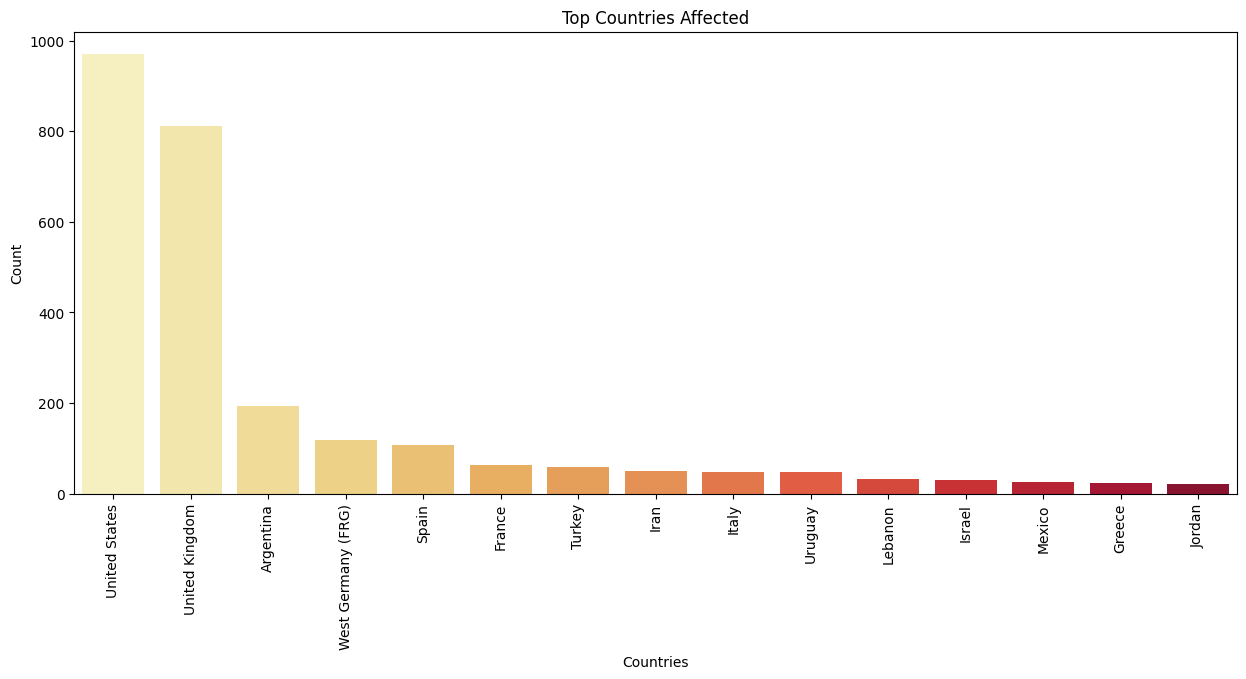

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
top_countries = df['Country'].value_counts()[:15]
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='YlOrRd')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Number of People Killed in Terrorist Attacks (By Countries)

In [35]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']

#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [36]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Andorra,Argentina,Australia,Austria,Belgium,Bolivia,Botswana,Brazil,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
Killed,0,0,0,54,1,4,0,0,1,2,...,1,981,131,4,0,1,33,1,0,4


Conclusion

Terrorist incidents in the Middle East and Northern Africa region have been associated with severe and deadly outcomes. This region has been identified as a hotspot for significant terrorist attacks. Contrary to a common perception linking Muslims with terrorism, it is worth noting that Muslims are often the primary victims of these terrorist acts. A closer examination of the data visualizations reveals that Iraq, Afghanistan, and Pakistan are among the most adversely affected nations, and it's noteworthy that these countries are predominantly Muslim.